## Markov Chain Modeling of Snakes and Ladders Game

In [4]:
import numpy as np
import pandas as pd

# Total number of squares on the board
N = 100

# Initialize the transition probability matrix
P = np.zeros((N, N))

# Define snakes and ladders as a dictionary {start: end}
snakes_and_ladders = {
    27: 10, 55: 16, 61: 14, 69: 50, 79: 5,
    81: 44, 87: 31, 91: 25, 95: 49, 97: 59,
    6: 23, 8: 30, 13: 47, 20: 39, 33: 70,
    37: 75, 41: 62, 57: 83, 66: 89, 77: 96
}

# Fill in the transition matrix
for i in range(N - 1):  # square 1 to 99
    for dice in range(1, 7):  # dice roll from 1 to 6
        next_square = i + dice + 1  # +1 for 0-indexed Python arrays
        if next_square > 100:
            continue
        if next_square in snakes_and_ladders:
            next_square = snakes_and_ladders[next_square]
        P[i][next_square - 1] += 1 / 6

# Square 100 is absorbing
P[99][99] = 1.0

# Create a pandas DataFrame for better visualization
df = pd.DataFrame(P, index=[f"{i+1}" for i in range(N)], columns=[f"{j+1}" for j in range(N)])

# Display the transition probability matrix
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
print("Transition Probability Matrix:")
print(df.round(3))  # Round for cleaner display

Transition Probability Matrix:
       1      2      3      4      5    6      7    8      9     10     11  \
1    0.0  0.167  0.167  0.167  0.167  0.0  0.167  0.0  0.000  0.000  0.000   
2    0.0  0.000  0.167  0.167  0.167  0.0  0.167  0.0  0.000  0.000  0.000   
3    0.0  0.000  0.000  0.167  0.167  0.0  0.167  0.0  0.167  0.000  0.000   
4    0.0  0.000  0.000  0.000  0.167  0.0  0.167  0.0  0.167  0.167  0.000   
5    0.0  0.000  0.000  0.000  0.000  0.0  0.167  0.0  0.167  0.167  0.167   
6    0.0  0.000  0.000  0.000  0.000  0.0  0.167  0.0  0.167  0.167  0.167   
7    0.0  0.000  0.000  0.000  0.000  0.0  0.000  0.0  0.167  0.167  0.167   
8    0.0  0.000  0.000  0.000  0.000  0.0  0.000  0.0  0.167  0.167  0.167   
9    0.0  0.000  0.000  0.000  0.000  0.0  0.000  0.0  0.000  0.167  0.167   
10   0.0  0.000  0.000  0.000  0.000  0.0  0.000  0.0  0.000  0.000  0.167   
11   0.0  0.000  0.000  0.000  0.000  0.0  0.000  0.0  0.000  0.000  0.000   
12   0.0  0.000  0.000  0.000  0.

## Graph Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_17648\3254958026.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


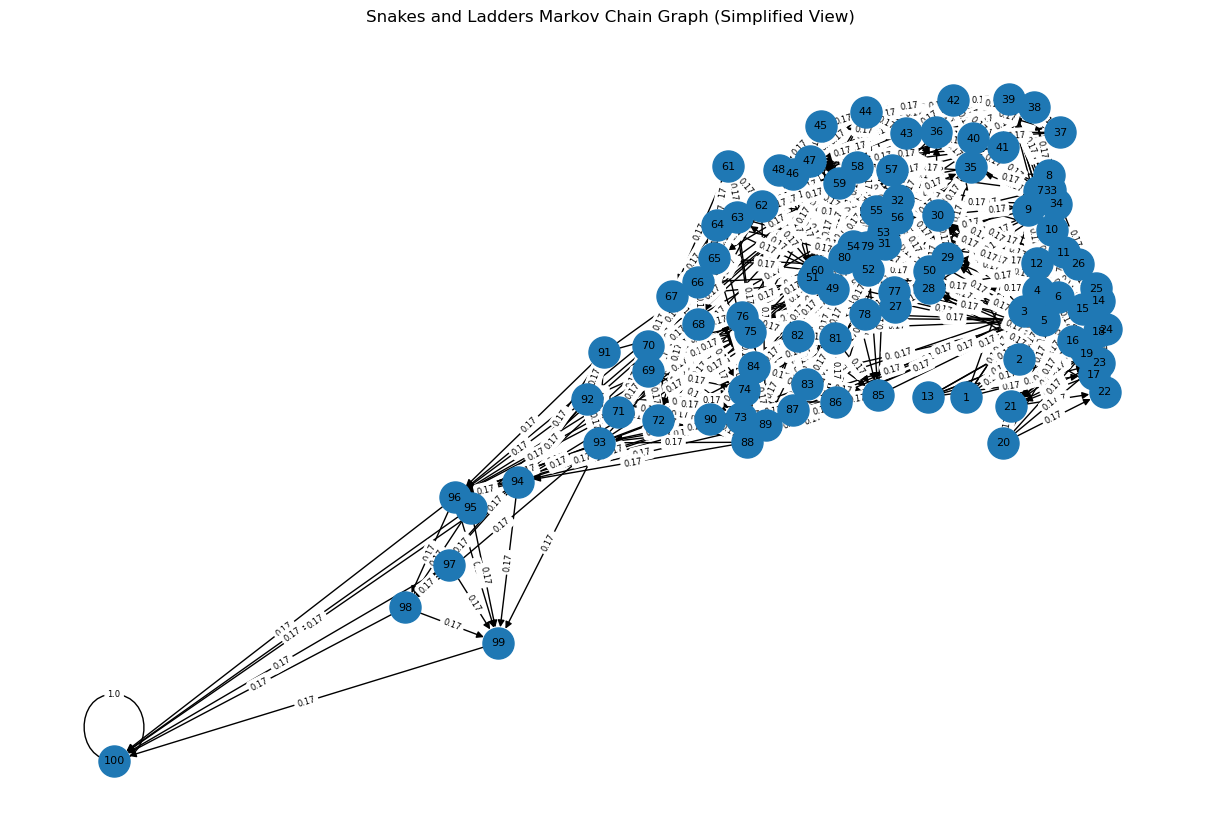

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add transitions as edges (only non-zero probabilities)
for i in range(N):
    for j in range(N):
        if P[i][j] > 0:
            G.add_edge(i + 1, j + 1, weight=round(P[i][j], 2))  # +1 for 1-based square labels

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for aesthetics
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, arrowsize=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("Snakes and Ladders Markov Chain Graph (Simplified View)")
plt.tight_layout()
plt.show()